<a href="https://colab.research.google.com/github/saikirankesoju/AIML/blob/main/2303A51539_set-1_Batch-22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

   PRICE     RM  LSTAT  PTRATIO
0   24.0  6.575   4.98     15.3
1   21.6  6.421   9.14     17.8
2   34.7  7.185   4.03     15.2
3   33.4  6.998   2.94     15.6
4   36.2  7.147   5.33     15.4
           PRICE         RM      LSTAT    PTRATIO
count  10.000000  10.000000  10.000000  10.000000
mean   25.030000   6.354900  12.548000  17.590000
std     7.607898   0.622297   8.911635   2.245712
min    15.000000   5.404000   2.940000  15.200000
25%    19.575000   6.006000   5.067500  15.450000
50%    23.450000   6.296500  10.785000  17.300000
75%    31.825000   6.892250  18.637500  19.600000
max    36.200000   7.185000  29.930000  21.000000
Accuracy: 0.00
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       3.0
           1       0.00      0.00      0.00       0.0

    accuracy                           0.00       3.0
   macro avg       0.00      0.00      0.00       3.0
weighted avg       0.00      0.00      0.00    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_

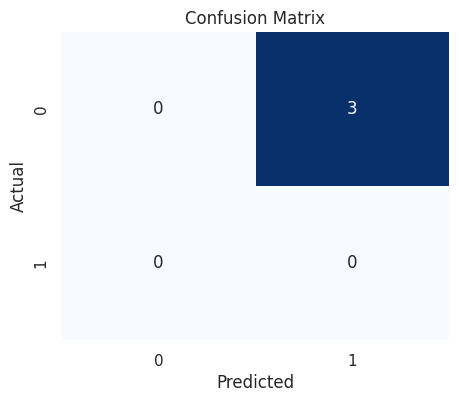

In [5]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('/content/housing.csv')  # Replace with your file path

# Basic data exploration
print(data.head())
print(data.describe())

# Preprocess data: Handle missing values
data.fillna(data.mean(), inplace=True)  # Filling missing values with mean
data['TARGET'] = (data['PRICE'] > data['PRICE'].median()).astype(int)  # Binary target (above median price)

# Feature selection (selecting numeric features for simplicity)
features = ['RM', 'LSTAT', 'PTRATIO']  # Example features, adjust as per dataset
X = data[features]
y = data['TARGET']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Visualize the confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()